In [3]:
from scipy.stats import qmc
import pandas as pd
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import shutil
import os
from sklearn.metrics import mean_squared_error
from math import sqrt
import subprocess
import scienceplots

import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [6]:
#reading in data with relative paths so that it can be used by others who clone repository from github
script_dir = os.getcwd()

#Calibration Folder
calibration_folder_path = os.path.abspath(os.path.join(script_dir, '..', '..', 'calibration'))

#July Source Folder
July_calibration_path = os.path.abspath(os.path.join(script_dir, '..', '..', 'calibration', 'July'))

#June Source Folder
June_calibration_path = os.path.abspath(os.path.join(script_dir, '..', '..', 'calibration', 'June'))

#August Source Folder
August_calibration_path = os.path.abspath(os.path.join(script_dir, '..', '..', 'calibration', 'August'))

#Temperature Observations folder
observed_temp_path = os.path.abspath(os.path.join(script_dir, '..', '..', 'observations', 'TemperatureDataObs'))

#Latin Hypercube Parameters
lhs = pd.read_csv(os.path.join(calibration_folder_path, 'hypercube_parameters1000.csv'))

#Temperature observations

obs = pd.read_csv(os.path.join(observed_temp_path, 'HourlySummer23Master_riverkm.csv'))


In [3]:
may_opt_rmse = pd.read_csv(r'D:\Ben_wd\THESIS\heatsource\WestFork\ModelRuns\Hayes\calibration\03152024_updatedinputs\hypercube\May\OptRMSE250_May.csv')
#non_zeros_rmse = opt_rmse[opt_rmse['overall rmse'] != 0]
#rmse_sorted = non_zeros_rmse.sort_values(by='0.0', ascending=True)
july_opt_rmse = pd.read_csv(r'D:\Ben_wd\THESIS\heatsource\WestFork\ModelRuns\Hayes\calibration\03152024_updatedinputs\hypercube\July\OptRMSE250_May.csv')
may_opt_rmse
july_opt_rmse.sort_values(by = 'overall rmse')


,thermal conductivity,thermal diffusivity,hypo thickness,hypo %,sediment porosity,wind function a,wind function b,accretion temp,tree canopy,grass canopy,...,8.5,8.0,7.2,5.7,2.7,2.3,1.2,0.0,overall rmse,nse
231,1.464525,0.006685,0.257199,0.013839,0.986165,3.819477e-09,1.348533e-09,10.211720,0.505246,0.295470,...,0.863032,0.637222,0.644415,0.741395,0.705601,0.642330,0.677429,0.753670,0.688500,0.871199
118,1.569648,0.006352,0.361485,0.012924,0.870830,2.978887e-09,1.487520e-09,9.535963,0.671480,0.300828,...,0.892336,0.686594,0.686243,0.772649,0.653851,0.650810,0.656337,0.737050,0.694450,0.869095
124,1.457698,0.006502,0.379649,0.015886,0.859520,3.044614e-09,1.031592e-09,9.859008,0.573824,0.155656,...,0.845312,0.722121,0.742234,0.778893,0.706098,0.707757,0.653185,0.733102,0.698156,0.868543
72,1.583294,0.006634,0.363105,0.010715,0.946733,2.701135e-09,1.515959e-09,9.291102,0.794624,0.137391,...,0.914278,0.676580,0.679783,0.738797,0.672541,0.633912,0.683363,0.755453,0.700189,0.866271
133,1.475301,0.006378,0.301419,0.015005,0.633929,3.250330e-09,1.073549e-09,9.520024,0.717785,0.254878,...,0.888446,0.643355,0.644702,0.686946,0.728686,0.668262,0.717212,0.782176,0.702775,0.865432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,1.590695,0.006362,0.260747,0.021445,0.907348,1.065513e-09,1.654410e-09,12.631411,0.541126,0.330660,...,1.194298,1.173496,1.244099,1.299721,1.400816,1.394646,1.194924,1.267138,1.065678,0.676709
166,1.420822,0.006464,0.366155,0.035382,0.873415,3.996240e-09,3.949164e-09,10.276657,0.605388,0.374765,...,1.320863,0.825109,0.799368,0.974304,1.255536,1.177539,1.265437,1.314846,1.076392,0.675411
162,1.565259,0.006633,0.281473,0.029884,0.839215,3.742887e-09,3.768611e-09,9.798636,0.764114,0.150303,...,1.336020,0.833480,0.796983,0.951029,1.319193,1.215662,1.316276,1.356972,1.087655,0.666346
213,1.554609,0.006728,0.314330,0.027784,0.878912,1.089803e-09,1.436955e-09,11.209541,0.559401,0.272043,...,1.243845,1.213263,1.281772,1.347474,1.471491,1.475872,1.247371,1.321488,1.106442,0.649979


In [4]:
joined_df = pd.merge(july_opt_rmse, may_opt_rmse['overall rmse'], left_index=True, right_index=True, how='left')

#joined_df = opt_rmse_july.merge(opt_rmse_may, left_index = True, right_index = True)
non_zeros_rmse = joined_df[joined_df['0.0'] != 0]
non_zeros_rmse = joined_df[joined_df['overall rmse_y'] != 0]

non_zeros_rmse['overall rmse averaged'] = (joined_df['overall rmse_y'] + joined_df['overall rmse_x'])/2
#rmse_sorted = non_zeros_rmse.sort_values(by='overall rmse averaged', ascending=True)
rmse_sorted = non_zeros_rmse.sort_values(by='overall rmse_x', ascending=True)

rmse_sorted.iloc[0]

thermal conductivity     1.464525e+00
thermal diffusivity      6.684711e-03
hypo thickness           2.571988e-01
hypo %                   1.383915e-02
sediment porosity        9.861655e-01
wind function a          3.819477e-09
wind function b          1.348533e-09
accretion temp           1.021172e+01
tree canopy              5.052457e-01
grass canopy             2.954699e-01
tree overhang            1.626243e-01
grass overhang           1.937035e+00
18.3                     0.000000e+00
17.5                     5.432974e-01
16.1                     6.829335e-01
14.9                     8.719968e-01
13.8                     6.852002e-01
12.2                     5.575790e-01
10.7                     6.329034e-01
8.5                      8.630317e-01
8.0                      6.372220e-01
7.2                      6.444146e-01
5.7                      7.413945e-01
2.7                      7.056014e-01
2.3                      6.423297e-01
1.2                      6.774288e-01
0.0         

### Running June

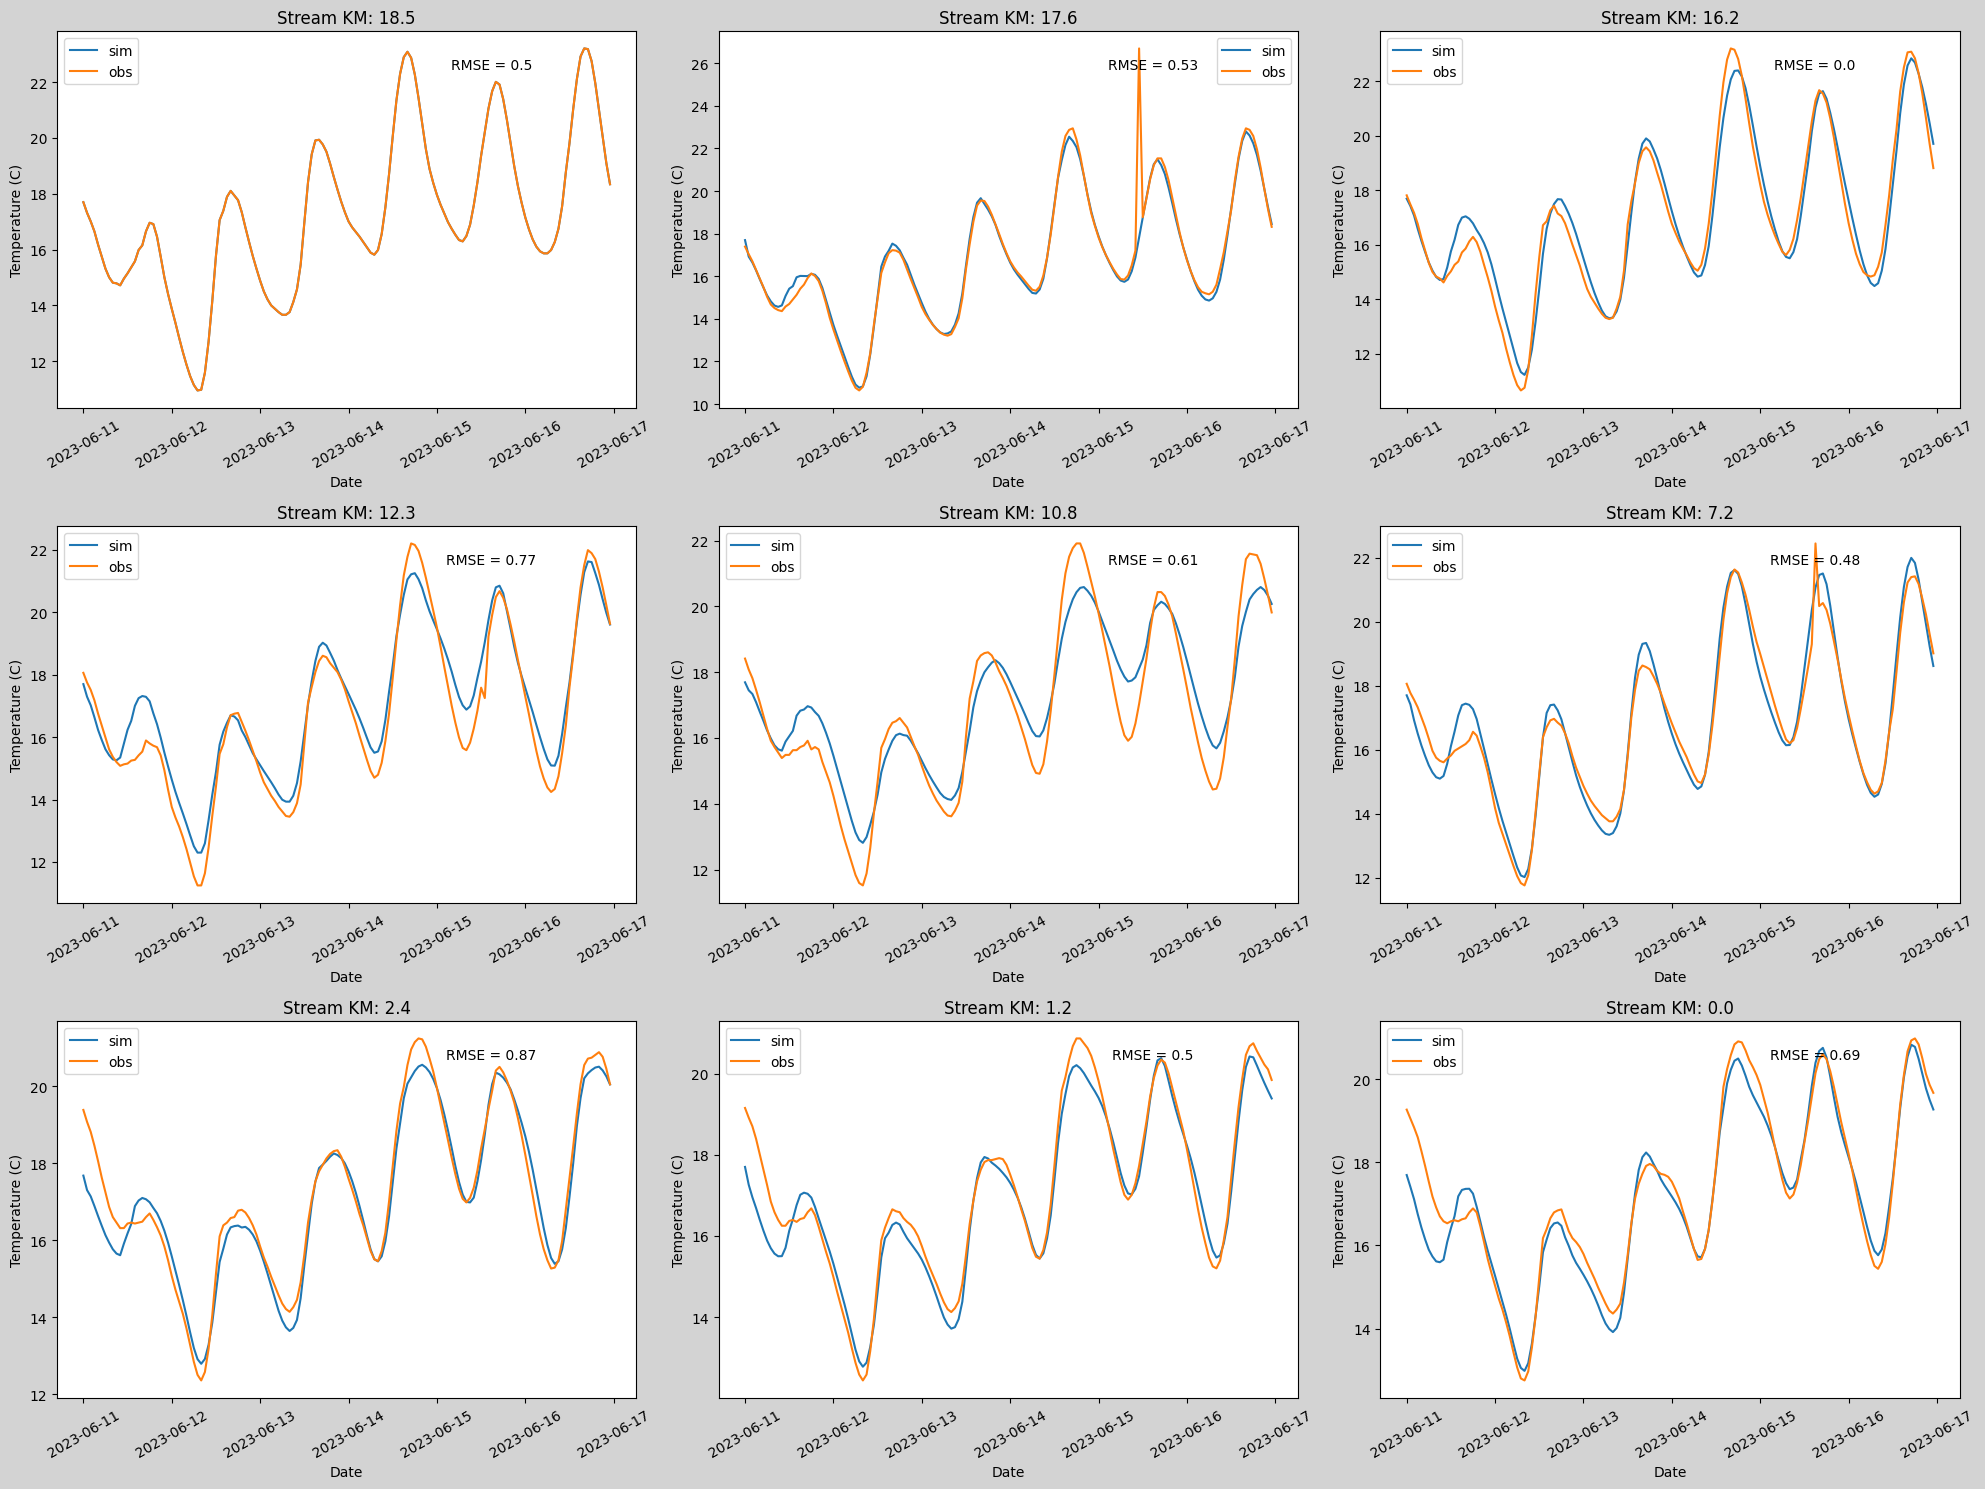

In [18]:
#Run June
hs_run =  lhs.iloc[109]
source_folder = June_calibration_path

os.chdir(source_folder)  # Change the current working directory

control_file = pd.read_csv(os.path.join(source_folder, 'HeatSource_Control.csv'))
morph_file = pd.read_csv(os.path.join(source_folder, "inputs", 'WFK23_morphology.csv'))
accretion_file = pd.read_csv(os.path.join(source_folder, "inputs", 'WFK23_accretion_notrib.csv'))
lccode_file = pd.read_csv(os.path.join(source_folder, "inputs", 'WFK23_lccode.csv'))

control_file.loc[2, 'VALUE'] = os.path.join(source_folder, "inputs\ ")# outputs folder
control_file.loc[3, 'VALUE'] = os.path.join(source_folder, "outputs\ ")# outputs folder


control_file.loc[25, 'VALUE'] = hs_run['wind function a']  # wind function a
control_file.loc[26, 'VALUE'] = hs_run['wind function b']  # wind function b
#control_file.loc[28, 'VALUE'] = hs_run['deep alluvium temp'] # deep alluvium temp
control_file.to_csv(os.path.join(source_folder, 'HeatSource_Control.csv'), index = False)

# Populate flow parameters
morph_file['SED_THERMAL_CONDUCTIVITY'] = hs_run['thermal conductivity']  # thermal conductivity
morph_file['SED_THERMAL_DIFFUSIVITY'] = hs_run['thermal diffusivity']  # thermal diffusivity
morph_file['SED_HYPORHEIC_THICKNESSS'] = hs_run['hypo thickness']  # hypo thickness
morph_file['HYPORHEIC_PERCENT'] = hs_run['hypo %']  # hypo %
morph_file['POROSITY'] = hs_run['sediment porosity']  # sediment porosity
#morph_file['MANNINGS_n']=lhs[n, 7] # Mannings N
morph_file.to_csv(os.path.join(source_folder, "inputs", 'WFK23_morphology.csv'), index = False)
#LCCode file
lccode_file["CANOPY"].iloc[1:] = hs_run['tree canopy'] #for tree polygons
lccode_file["OVERHANG"].iloc[1:] = hs_run['tree overhang'] #overhang for tree polygons
lccode_file["CANOPY"].iloc[:1] = hs_run['grass canopy'] #for grass polygons
lccode_file["OVERHANG"].iloc[:1] = hs_run['grass overhang'] #overhang for grass polygons

lccode_file.to_csv(os.path.join(source_folder, "inputs", 'WFK23_lccode.csv'), index = False)


# Populate accretion parameterss
accretion_file['TEMPERATURE'] = hs_run['accretion temp'] #accretion temp
accretion_file.to_csv(os.path.join(source_folder, "inputs", 'WFK23_accretion_notrib.csv'), index = False)


# Run HS9
#os.system('D:/Ben_wd/THESIS/heatsource/WestFork/ModelRuns/Hayes/runs/latinhypercubetest/hs9_run_temperature.py')
#!hs run -t
subprocess.run(['hs', 'run', '-t'], cwd=source_folder, stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
#Compare and plot
#get start and end dates
cc_start = control_file.loc[7]['VALUE']
cc_start = pd.to_datetime(cc_start)
cc_end = control_file.loc[8]['VALUE']
cc_end = pd.to_datetime(cc_end)
#organize Obs data
#obs = pd.read_csv(r"D:\Ben_wd\THESIS\streamtemperature\WFK23\Summer23\mainstemhourly_km.csv")
obs["datetime"] = pd.to_datetime(obs["datetime"])
obs_clip = obs[(obs["datetime"]>=cc_start) & (obs["datetime"]<cc_end + pd.DateOffset(1))]
obs_clip = obs_clip.dropna(axis=1)
obs_clip = obs_clip.set_index('datetime')
#obs_clip.columns = [float(col) for col in obs_clip.columns[2:]]
obs_clip.columns = [float(col) for col in obs_clip.columns]
obs_tw = obs_clip.to_numpy()
#Organize Sim data
sim_tw_df = pd.read_csv(os.path.join(source_folder, 'outputs', 'Temp_H2O.csv'), skiprows=6,
         usecols=range(1, 187))
sim_tw_df.columns = [float(col) for col in sim_tw_df.columns]
common_columns = set(sim_tw_df.columns) & set(obs_clip.columns)
sim_tw_df = sim_tw_df[obs_clip.columns]
sim_tw = sim_tw_df.to_numpy()
#print(starting_run_number)
cc_start = control_file.loc[7]['VALUE']
cc_start = pd.to_datetime(cc_start)
cc_end = control_file.loc[8]['VALUE']
cc_end = pd.to_datetime(cc_end)
#organize Obs data
#obs = pd.read_csv(r"D:\Ben_wd\THESIS\streamtemperature\WFK23\Summer23\mainstemhourly_km.csv")
obs["datetime"] = pd.to_datetime(obs["datetime"])
obs_clip = obs[(obs["datetime"]>=cc_start) & (obs["datetime"]<cc_end + pd.DateOffset(1))]
obs_clip = obs_clip.dropna(axis=1)
obs_clip = obs_clip.set_index('datetime')
#obs_clip.columns = [float(col) for col in obs_clip.columns[2:]]
obs_clip.columns = [float(col) for col in obs_clip.columns]
obs_tw = obs_clip.to_numpy()
#Organize Sim data
sim_tw_df = pd.read_csv(os.path.join(source_folder, 'outputs', 'Temp_H2O.csv'), skiprows=6,
         usecols=range(1, 187))
sim_tw_df.columns = [float(col) for col in sim_tw_df.columns]
common_columns = set(sim_tw_df.columns) & set(obs_clip.columns)
sim_tw_df = sim_tw_df[obs_clip.columns]
sim_tw = sim_tw_df.to_numpy()
#print(starting_run_number)

sorted_columns = sorted(obs_clip.columns, reverse=True)
columns = len(sorted_columns)//3
# Plotting
fig, axes = plt.subplots(3, columns, figsize=(20, 15))
axes = axes.flatten()

# Iterate through sorted columns and plot each one in its own subplot
for i, col in enumerate(sorted_columns):
    rmse_values = np.sqrt(np.mean((sim_tw - obs_tw) ** 2, axis=0))
    title = str(col)
    axes[i].plot(obs_clip.index, sim_tw_df[col], label='sim')
    axes[i].plot(obs_clip.index, obs_clip[col], label='obs')

    # Add labels, title, and legend to each subplot
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Temperature (C)')
    axes[i].set_title(f'Stream KM: {title}')
    axes[i].legend()
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].text(0.75, 0.9, f'RMSE = {round(rmse_values[i], 2)}', horizontalalignment='center', transform=axes[i].transAxes)

# Set background color of the figure
fig.patch.set_facecolor('lightgrey')

# Adjust layout
plt.tight_layout()

# Save the plot to a file
plt.savefig('June_tempcomparison_plot.png', facecolor=fig.get_facecolor())


### Running july

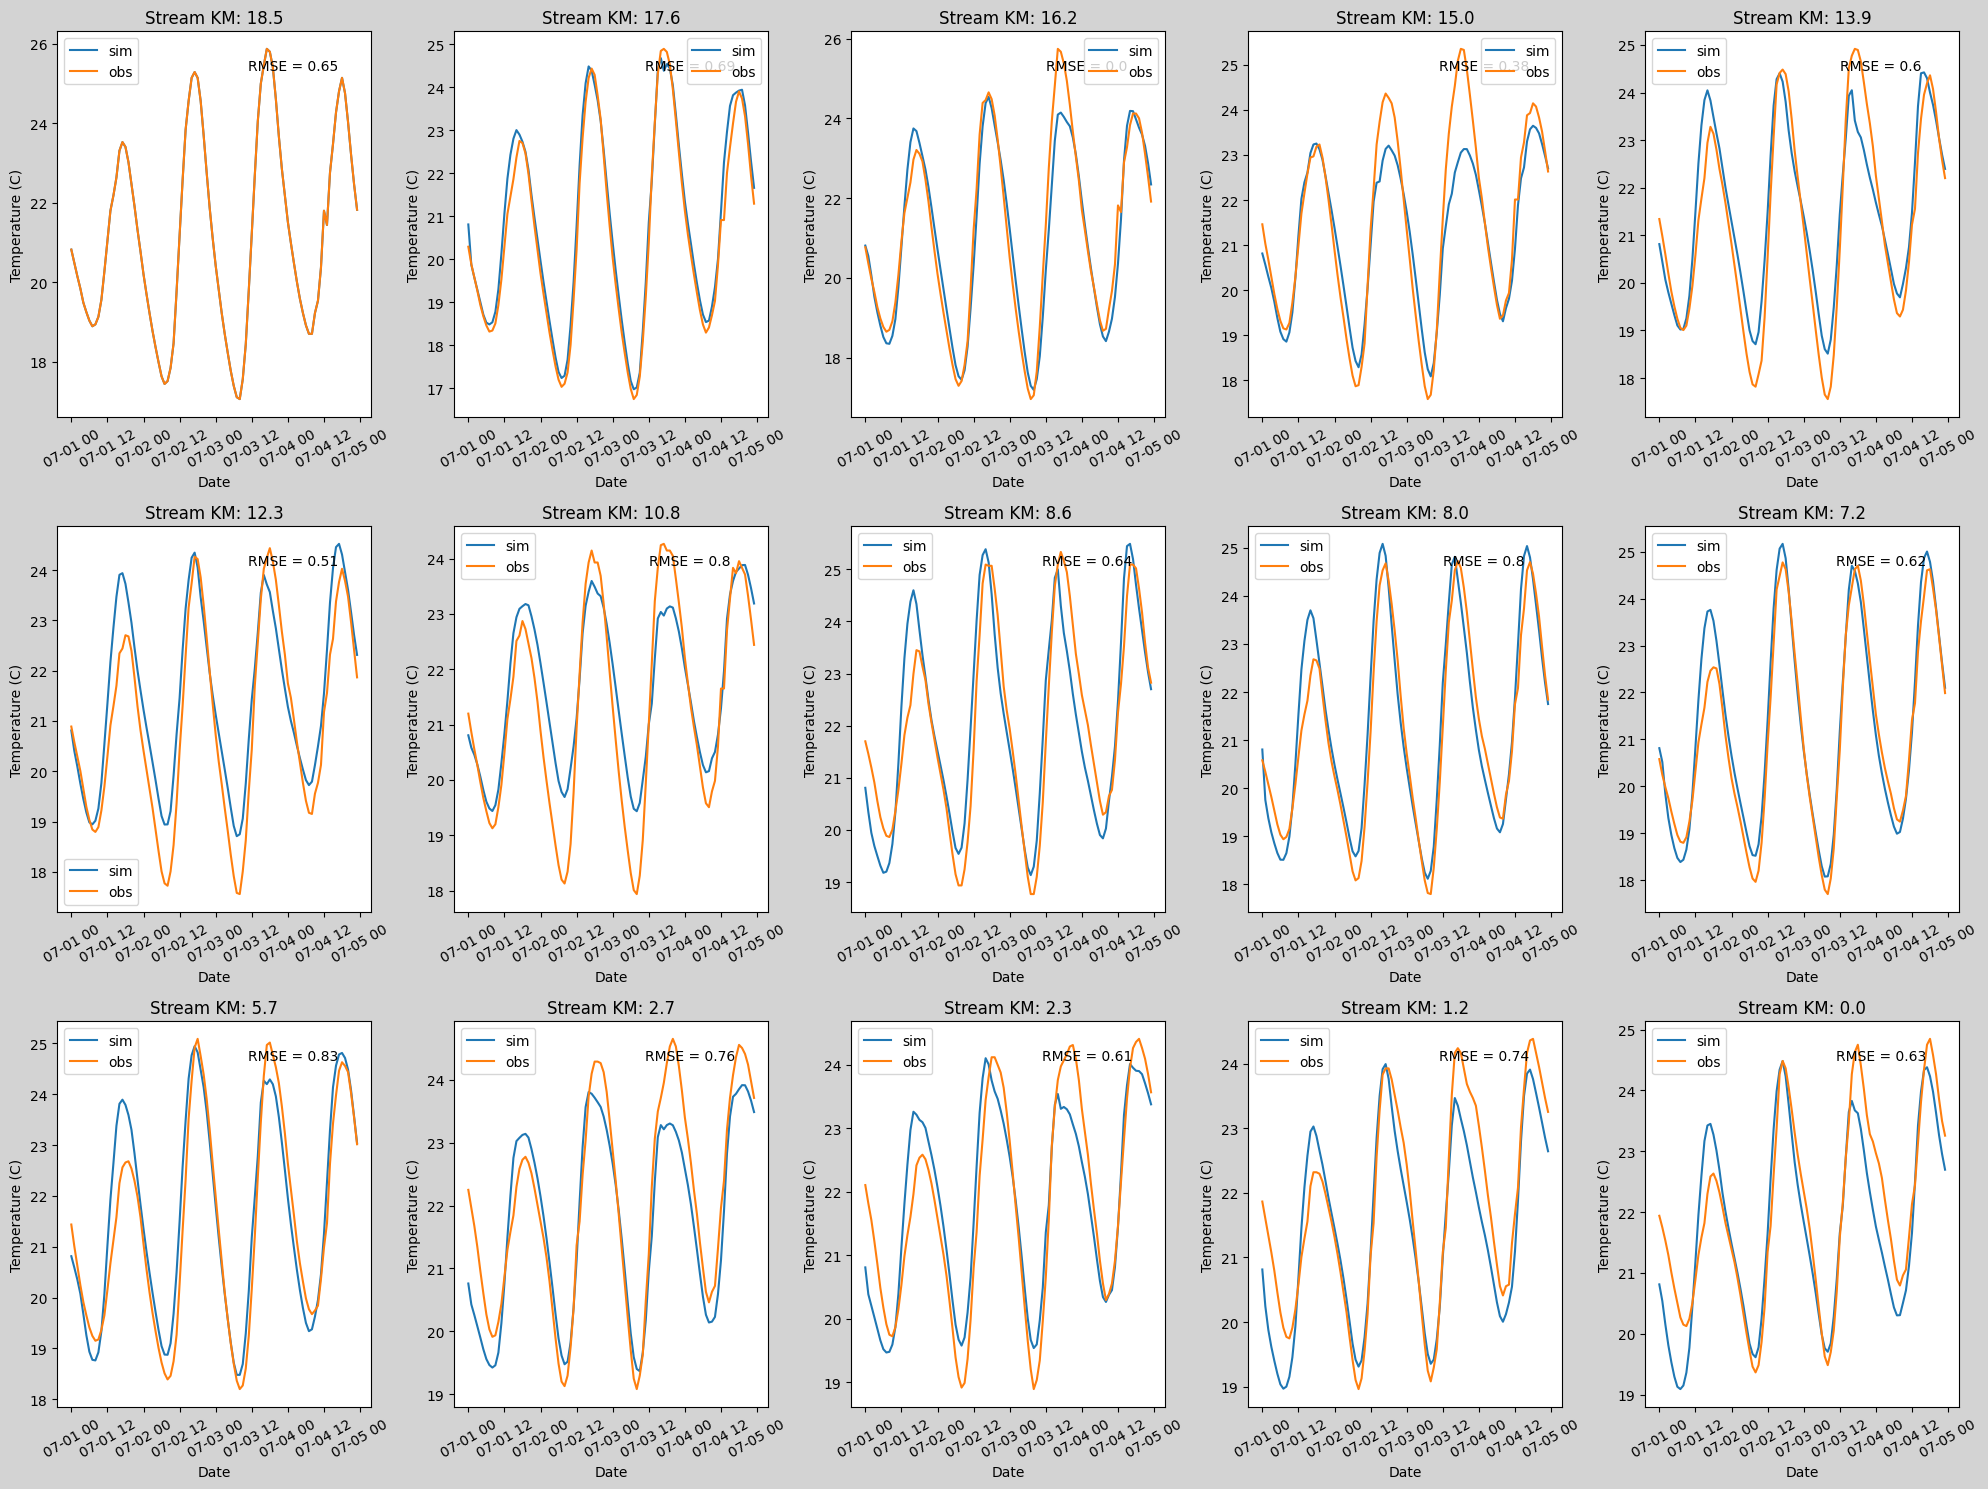

In [23]:
#Run July
hs_run =  lhs.iloc[109]
source_folder = July_calibration_path
os.chdir(source_folder)  # Change the current working directory

control_file = pd.read_csv(os.path.join(source_folder, 'HeatSource_Control.csv'))
morph_file = pd.read_csv(os.path.join(source_folder, "inputs", 'WFK23_morphology.csv'))
accretion_file = pd.read_csv(os.path.join(source_folder, "inputs", 'WFK23_accretion_notrib.csv'))
lccode_file = pd.read_csv(os.path.join(source_folder, "inputs", 'WFK23_lccode.csv'))

control_file.loc[2, 'VALUE'] = os.path.join(source_folder, "inputs\ ")# outputs folder
control_file.loc[3, 'VALUE'] = os.path.join(source_folder, "outputs\ ")# outputs folder


control_file.loc[25, 'VALUE'] = hs_run['wind function a']  # wind function a
control_file.loc[26, 'VALUE'] = hs_run['wind function b']  # wind function b
#control_file.loc[28, 'VALUE'] = hs_run['deep alluvium temp'] # deep alluvium temp
control_file.to_csv(os.path.join(source_folder, 'HeatSource_Control.csv'), index = False)

# Populate flow parameters
morph_file['SED_THERMAL_CONDUCTIVITY'] = hs_run['thermal conductivity']  # thermal conductivity
morph_file['SED_THERMAL_DIFFUSIVITY'] = hs_run['thermal diffusivity']  # thermal diffusivity
morph_file['SED_HYPORHEIC_THICKNESSS'] = hs_run['hypo thickness']  # hypo thickness
morph_file['HYPORHEIC_PERCENT'] = hs_run['hypo %']  # hypo %
morph_file['POROSITY'] = hs_run['sediment porosity']  # sediment porosity
#morph_file['MANNINGS_n']=lhs[n, 7] # Mannings N
morph_file.to_csv(os.path.join(source_folder, "inputs", 'WFK23_morphology.csv'), index = False)
#LCCode file
lccode_file["CANOPY"].iloc[1:] = hs_run['tree canopy'] #for tree polygons
lccode_file["OVERHANG"].iloc[1:] = hs_run['tree overhang'] #overhang for tree polygons
lccode_file["CANOPY"].iloc[:1] = hs_run['grass canopy'] #for grass polygons
lccode_file["OVERHANG"].iloc[:1] = hs_run['grass overhang'] #overhang for grass polygons

lccode_file.to_csv(os.path.join(source_folder, "inputs", 'WFK23_lccode.csv'), index = False)


# Populate accretion parameterss
accretion_file['TEMPERATURE'] = hs_run['accretion temp'] #accretion temp
accretion_file.to_csv(os.path.join(source_folder, "inputs", 'WFK23_accretion_notrib.csv'), index = False)


# Run HS9
#os.system('D:/Ben_wd/THESIS/heatsource/WestFork/ModelRuns/Hayes/runs/latinhypercubetest/hs9_run_temperature.py')
#!hs run -t
subprocess.run(['hs', 'run', '-t'], cwd=source_folder, stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
#Compare and plot
#get start and end dates
cc_start = control_file.loc[7]['VALUE']
cc_start = pd.to_datetime(cc_start)
cc_end = control_file.loc[8]['VALUE']
cc_end = pd.to_datetime(cc_end)
#organize Obs data
obs["datetime"] = pd.to_datetime(obs["datetime"])
obs_clip = obs[(obs["datetime"]>=cc_start) & (obs["datetime"]<cc_end)] #+ pd.DateOffset(1))]
obs_clip = obs_clip.dropna(axis=1)
obs_clip = obs_clip.set_index('datetime')
#obs_clip.columns = [float(col) for col in obs_clip.columns[2:]]
obs_clip.columns = [float(col) for col in obs_clip.columns]
obs_clip.drop(19.3, axis=1, inplace=True)
obs_tw = obs_clip.to_numpy()
#Organize Sim data
sim_tw_df = pd.read_csv(os.path.join(source_folder, 'outputs', 'Temp_H2O.csv'), skiprows=6,
         usecols=range(1, 187))
sim_tw_df.columns = [float(col) for col in sim_tw_df.columns]
common_columns = set(sim_tw_df.columns) & set(obs_clip.columns)
sim_tw_df = sim_tw_df[obs_clip.columns]
sim_tw = sim_tw_df.to_numpy()
#print(starting_run_number)
sorted_columns = sorted(obs_clip.columns, reverse=True)
columns = len(sorted_columns)//3
# Plotting
fig, axes = plt.subplots(3, columns, figsize=(20, 15))
axes = axes.flatten()

# Iterate through sorted columns and plot each one in its own subplot
for i, col in enumerate(sorted_columns):
    rmse_values = np.sqrt(np.mean((sim_tw - obs_tw) ** 2, axis=0))
    title = str(col)
    axes[i].plot(obs_clip.index, sim_tw_df[col], label='sim')
    axes[i].plot(obs_clip.index, obs_clip[col], label='obs')

    # Add labels, title, and legend to each subplot
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Temperature (C)')
    axes[i].set_title(f'Stream KM: {title}')
    axes[i].legend()
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].text(0.75, 0.9, f'RMSE = {round(rmse_values[i], 2)}', horizontalalignment='center', transform=axes[i].transAxes)

# Set background color of the figure
fig.patch.set_facecolor('lightgrey')

# Adjust layout
plt.tight_layout()

# Save the plot to a file
plt.savefig('July_tempcomparison_plot.png', facecolor=fig.get_facecolor())
# #plotting
# # Create a new figure with a 3x3 grid of subplots
# # fig, axes = plt.subplots(5, 3, figsize=(20, 15))

# # # Flatten the axes array to make it easier to iterate over
# # axes = axes.flatten()

# # Iterate through columns and plot each one in its own subplot
# with plt.style.context(['science', 'no-latex']):
#     fig, axes = plt.subplots(5, 3, figsize=(40, 35), layout = 'compressed')
# # Flatten the axes array to make it easier to iterate over
#     axes = axes.flatten() 
#     #fig.suptitle('July Calibration', fontsize=60)

#     #fig.subplots_adjust(top=.925, hspace=0.5, wspace=0.3)

#     # Iterate through columns and plot each one in its own subplot
#     for i, col in enumerate(obs_clip.columns):
#         rmse_values = np.sqrt(np.mean((sim_tw - obs_tw) ** 2, axis=0))
#         title = float(col)
#         axes[i].plot(obs_clip.index, sim_tw_df[col], label='Modeled', color = 'red', lw = 3)
#         axes[i].plot(obs_clip.index, obs_clip[col], label='Observed', color = 'blue', lw = 3)

#         # Add labels, title, and legend to each subplot
#         #axes[i].set_xlabel('Date')
#         axes[i].set_ylabel('Temperature (c)', fontsize = 45)
#         axes[i].set_title(f'Stream KM: {round((18.3-title),2)}', fontsize = 50)
#         #axes[i].legend(fontsize = 40,loc = 'lower right')
#         axes[i].tick_params(axis='x', rotation=30, labelsize = 40)
#         axes[i].tick_params(axis='y', labelsize = 40)
#         axes[i].set_ylim(16,27)
#         axes[i].spines['top'].set_visible(False)
#         axes[i].spines['right'].set_visible(False)
#         axes[i].spines['bottom'].set_visible(False)
#         axes[i].spines['left'].set_visible(False)


#         axes[i].text(0.15, 0.9, f'RMSE = {round(rmse_values[i],2)}', horizontalalignment='center', transform=axes[i].transAxes, fontsize = 40)
#         #axes[i].grid(True)
#     # plt.tight_layout()

#     #legend = axes[0].legend(['Modeled', 'Observed'], fontsize=40, loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)

#        #Set background color of the figure
#     #fig.patch.set_facecolor('lightgrey')

#     # Adjust layout

#     # Save the plot to a file
    
# # Save the plot to a file
#     #plt.savefig(r'D:\Ben_wd\THESIS\figs\Thesis\July_tempcomparison_plot.png', dpi = 300,  bbox_inches='tight')
#     plt.show()



### Running August


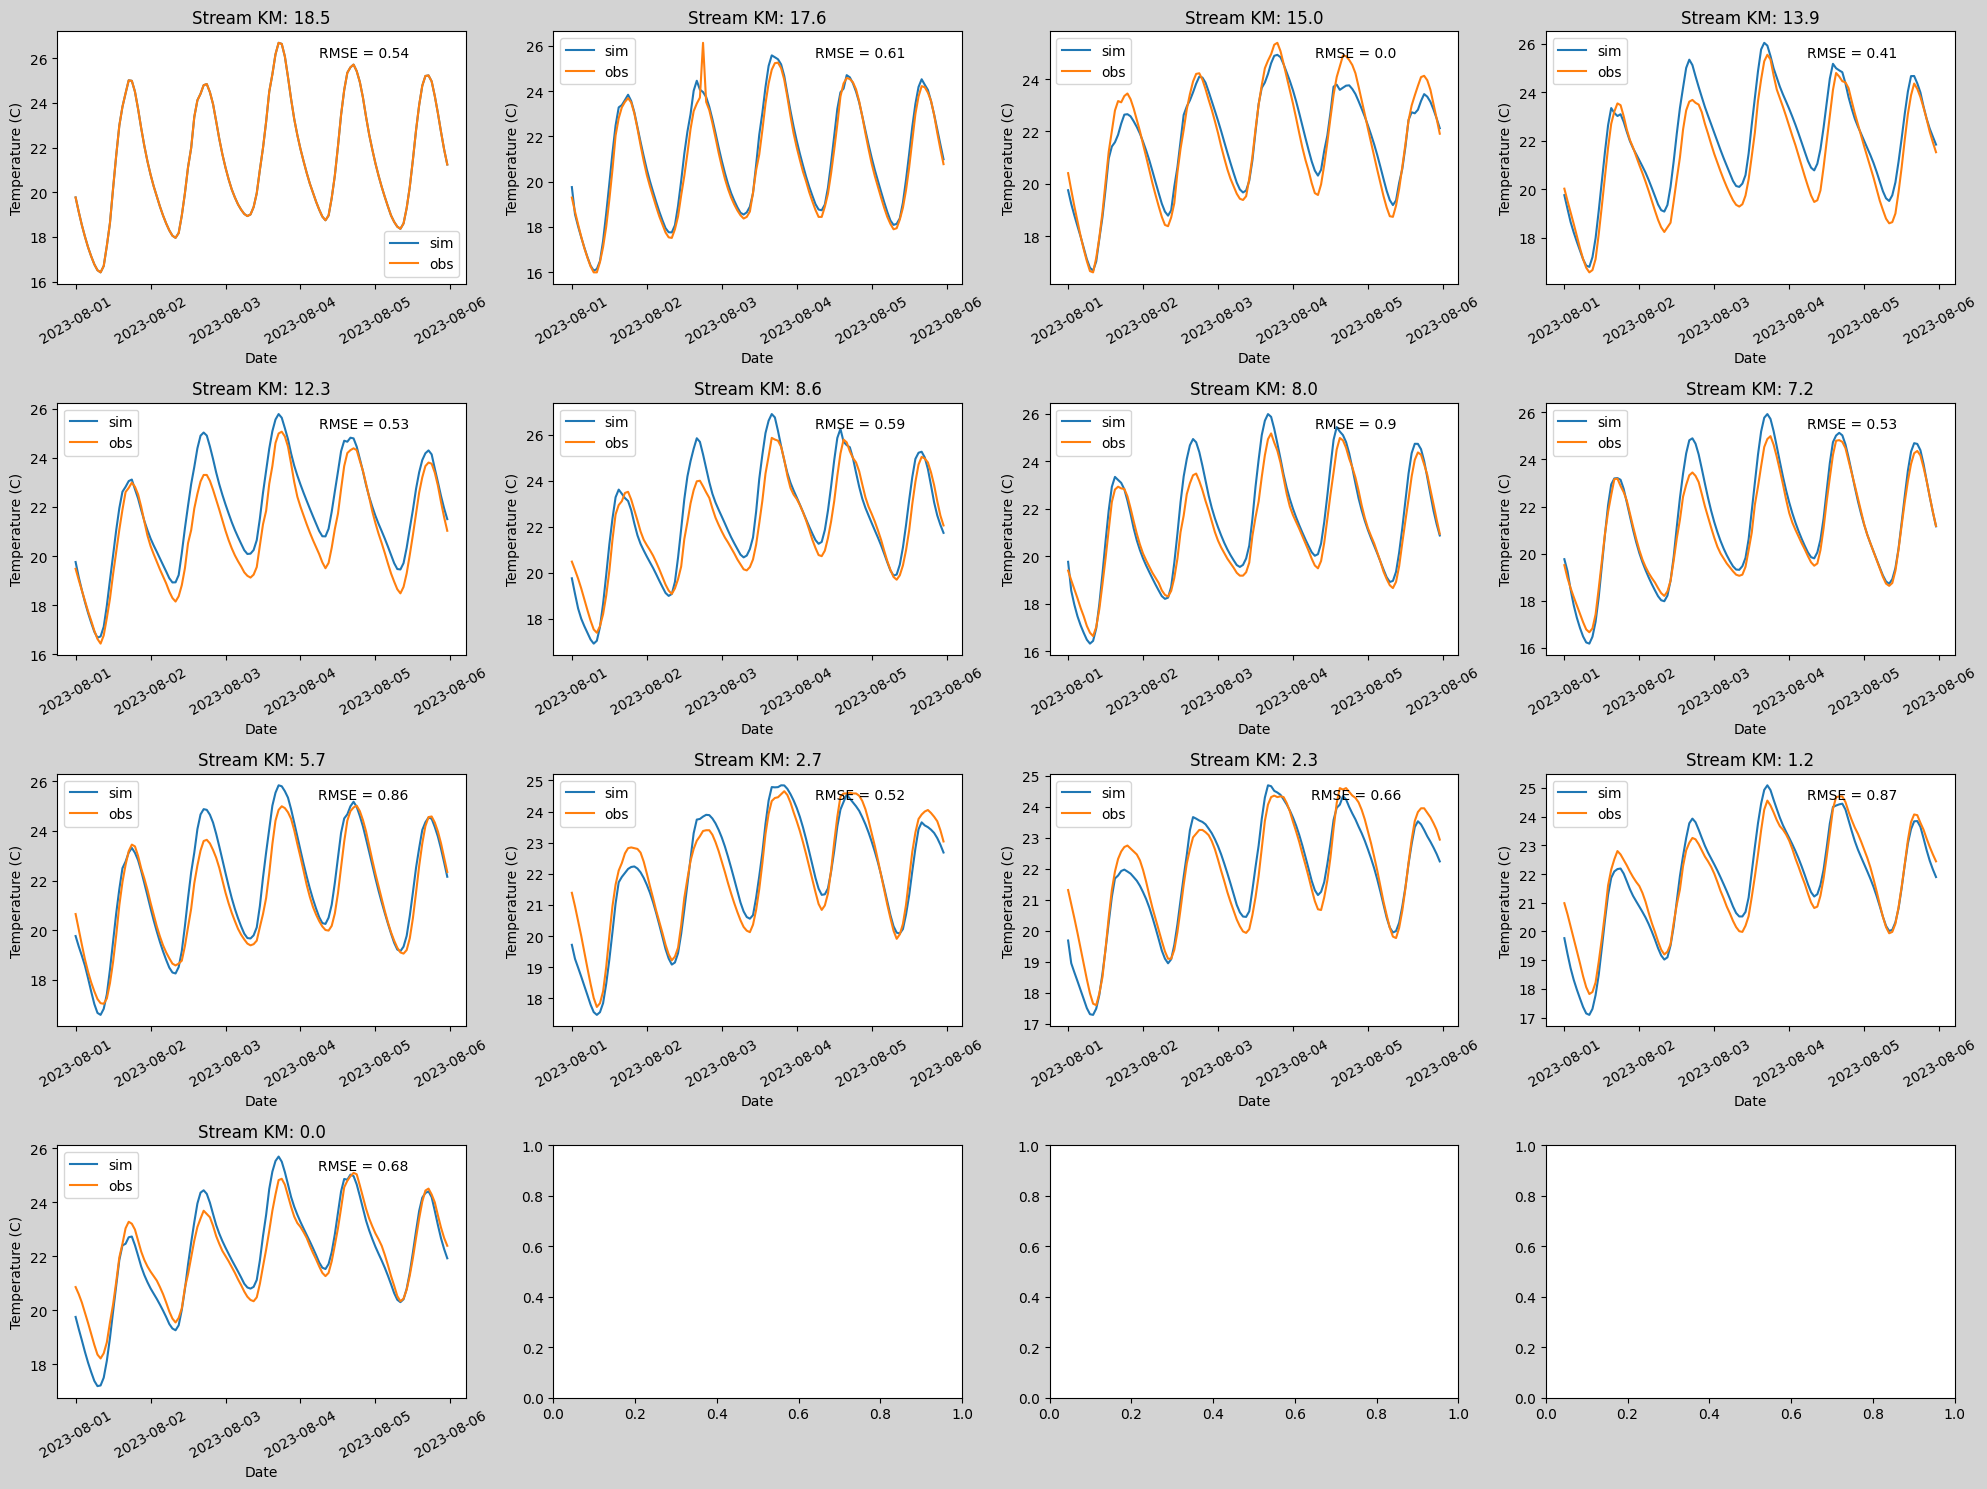

In [28]:
#Run July
hs_run =  lhs.iloc[109]
source_folder = August_calibration_path
os.chdir(source_folder)  # Change the current working directory

control_file = pd.read_csv(os.path.join(source_folder, 'HeatSource_Control.csv'))
morph_file = pd.read_csv(os.path.join(source_folder, "inputs", 'WFK23_morphology.csv'))
accretion_file = pd.read_csv(os.path.join(source_folder, "inputs", 'WFK23_accretion_notrib.csv'))
lccode_file = pd.read_csv(os.path.join(source_folder, "inputs", 'WFK23_lccode.csv'))

control_file.loc[2, 'VALUE'] = os.path.join(source_folder, "inputs\ ")# outputs folder
control_file.loc[3, 'VALUE'] = os.path.join(source_folder, "outputs\ ")# outputs folder


control_file.loc[25, 'VALUE'] = hs_run['wind function a']  # wind function a
control_file.loc[26, 'VALUE'] = hs_run['wind function b']  # wind function b
#control_file.loc[28, 'VALUE'] = hs_run['deep alluvium temp'] # deep alluvium temp
control_file.to_csv(os.path.join(source_folder, 'HeatSource_Control.csv'), index = False)

# Populate flow parameters
morph_file['SED_THERMAL_CONDUCTIVITY'] = hs_run['thermal conductivity']  # thermal conductivity
morph_file['SED_THERMAL_DIFFUSIVITY'] = hs_run['thermal diffusivity']  # thermal diffusivity
morph_file['SED_HYPORHEIC_THICKNESSS'] = hs_run['hypo thickness']  # hypo thickness
morph_file['HYPORHEIC_PERCENT'] = hs_run['hypo %']  # hypo %
morph_file['POROSITY'] = hs_run['sediment porosity']  # sediment porosity
#morph_file['MANNINGS_n']=lhs[n, 7] # Mannings N
morph_file.to_csv(os.path.join(source_folder, "inputs", 'WFK23_morphology.csv'), index = False)
#LCCode file
lccode_file["CANOPY"].iloc[1:] = hs_run['tree canopy'] #for tree polygons
lccode_file["OVERHANG"].iloc[1:] = hs_run['tree overhang'] #overhang for tree polygons
lccode_file["CANOPY"].iloc[:1] = hs_run['grass canopy'] #for grass polygons
lccode_file["OVERHANG"].iloc[:1] = hs_run['grass overhang'] #overhang for grass polygons

lccode_file.to_csv(os.path.join(source_folder, "inputs", 'WFK23_lccode.csv'), index = False)


# Populate accretion parameterss
accretion_file['TEMPERATURE'] = hs_run['accretion temp'] #accretion temp
accretion_file.to_csv(os.path.join(source_folder, "inputs", 'WFK23_accretion_notrib.csv'), index = False)


# Run HS9
#os.system('D:/Ben_wd/THESIS/heatsource/WestFork/ModelRuns/Hayes/runs/latinhypercubetest/hs9_run_temperature.py')
#!hs run -t
#subprocess.run(['hs', 'run', '-t'], cwd=source_folder, stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
#Compare and plot
#get start and end dates
cc_start = control_file.loc[7]['VALUE']
cc_start = pd.to_datetime(cc_start)
cc_end = control_file.loc[8]['VALUE']
cc_end = pd.to_datetime(cc_end)
#organize Obs data
obs["datetime"] = pd.to_datetime(obs["datetime"])
obs_clip = obs[(obs["datetime"]>=cc_start) & (obs["datetime"]<cc_end +pd.DateOffset(1))]
obs_clip = obs_clip.dropna(axis=1)
obs_clip = obs_clip.set_index('datetime')
#obs_clip.columns = [float(col) for col in obs_clip.columns[2:]]
obs_clip.columns = [float(col) for col in obs_clip.columns]
obs_clip.drop(19.3, axis=1, inplace=True)
obs_tw = obs_clip.to_numpy()
#Organize Sim data
sim_tw_df = pd.read_csv(os.path.join(source_folder, 'outputs', 'Temp_H2O.csv'), skiprows=6,
         usecols=range(1, 187))
sim_tw_df.columns = [float(col) for col in sim_tw_df.columns]
common_columns = set(sim_tw_df.columns) & set(obs_clip.columns)
sim_tw_df = sim_tw_df[obs_clip.columns]
sim_tw = sim_tw_df.to_numpy()
#print(starting_run_number)
sorted_columns = sorted(obs_clip.columns, reverse=True)
columns = len(sorted_columns)//3
# Plotting
fig, axes = plt.subplots(columns, 3+1, figsize=(20, 15))
axes = axes.flatten()

# Iterate through sorted columns and plot each one in its own subplot
for i, col in enumerate(sorted_columns):
    rmse_values = np.sqrt(np.mean((sim_tw - obs_tw) ** 2, axis=0))
    title = str(col)
    axes[i].plot(obs_clip.index, sim_tw_df[col], label='sim')
    axes[i].plot(obs_clip.index, obs_clip[col], label='obs')

    # Add labels, title, and legend to each subplot
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Temperature (C)')
    axes[i].set_title(f'Stream KM: {title}')
    axes[i].legend()
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].text(0.75, 0.9, f'RMSE = {round(rmse_values[i], 2)}', horizontalalignment='center', transform=axes[i].transAxes)

# Set background color of the figure
fig.patch.set_facecolor('lightgrey')

# Adjust layout
plt.tight_layout()

# Save the plot to a file
plt.savefig('August_tempcomparison_plot.png', facecolor=fig.get_facecolor())
# #plotting
# # Create a new figure with a 3x3 grid of subplots
# # fig, axes = plt.subplots(5, 3, figsize=(20, 15))

# # # Flatten the axes array to make it easier to iterate over
# # axes = axes.flatten()

# # Iterate through columns and plot each one in its own subplot
# with plt.style.context(['science', 'no-latex']):
#     fig, axes = plt.subplots(5, 3, figsize=(40, 35), layout = 'compressed')
# # Flatten the axes array to make it easier to iterate over
#     axes = axes.flatten() 
#     #fig.suptitle('July Calibration', fontsize=60)

#     #fig.subplots_adjust(top=.925, hspace=0.5, wspace=0.3)

#     # Iterate through columns and plot each one in its own subplot
#     for i, col in enumerate(obs_clip.columns):
#         rmse_values = np.sqrt(np.mean((sim_tw - obs_tw) ** 2, axis=0))
#         title = float(col)
#         axes[i].plot(obs_clip.index, sim_tw_df[col], label='Modeled', color = 'red', lw = 3)
#         axes[i].plot(obs_clip.index, obs_clip[col], label='Observed', color = 'blue', lw = 3)

#         # Add labels, title, and legend to each subplot
#         #axes[i].set_xlabel('Date')
#         axes[i].set_ylabel('Temperature (c)', fontsize = 45)
#         axes[i].set_title(f'Stream KM: {round((18.3-title),2)}', fontsize = 50)
#         #axes[i].legend(fontsize = 40,loc = 'lower right')
#         axes[i].tick_params(axis='x', rotation=30, labelsize = 40)
#         axes[i].tick_params(axis='y', labelsize = 40)
#         axes[i].set_ylim(16,27)
#         axes[i].spines['top'].set_visible(False)
#         axes[i].spines['right'].set_visible(False)
#         axes[i].spines['bottom'].set_visible(False)
#         axes[i].spines['left'].set_visible(False)


#         axes[i].text(0.15, 0.9, f'RMSE = {round(rmse_values[i],2)}', horizontalalignment='center', transform=axes[i].transAxes, fontsize = 40)
#         #axes[i].grid(True)
#     # plt.tight_layout()

#     #legend = axes[0].legend(['Modeled', 'Observed'], fontsize=40, loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)

#        #Set background color of the figure
#     #fig.patch.set_facecolor('lightgrey')

#     # Adjust layout

#     # Save the plot to a file
    
# # Save the plot to a file
#     #plt.savefig(r'D:\Ben_wd\THESIS\figs\Thesis\July_tempcomparison_plot.png', dpi = 300,  bbox_inches='tight')
#     plt.show()



In [112]:
common_columns

{0.0, 1.2, 7.2, 10.7, 12.2, 16.1, 17.5, 18.3}

### Longitudinal Plots

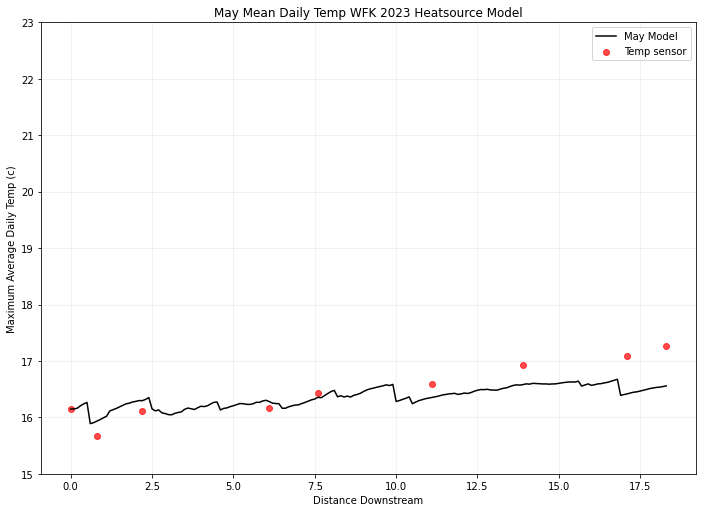

In [92]:
may_source_folder = r'D:/Ben_wd/THESIS/heatsource/WestFork/ModelRuns/Hayes/calibration/03152024_updatedinputs/May'

scenario_control_file = pd.read_csv(os.path.join(may_source_folder, 'HeatSource_Control.csv'))

cc_start = scenario_control_file.loc[7]['VALUE']
cc_start = pd.to_datetime(cc_start)
cc_end = scenario_control_file.loc[8]['VALUE']
cc_end = pd.to_datetime(cc_end)

#obs data
obs = pd.read_csv(r"D:\Ben_wd\THESIS\streamtemperature\WFK23\Summer23\mainstemhourly_km.csv")
obs["datetime"] = pd.to_datetime(obs["datetime"])
obs_clip = obs[(obs["datetime"]>=cc_start) & (obs["datetime"]<cc_end + pd.DateOffset(1))]
obs_clip = obs_clip.dropna(axis=1)
obs_clip = obs_clip.set_index('datetime')
#obs_clip.columns = [float(col) for col in obs_clip.columns[2:]]
obs_clip.columns = [float(col) for col in obs_clip.columns]
#obs_clip.drop(19.2, axis=1, inplace=True)
#summaries for obs data
mean_may_obs = obs_clip.mean()
mean_may_obs = pd.DataFrame(mean_may_obs)
mean_may_obs = mean_may_obs.reset_index()
mean_may_obs.rename(columns={'index': 'NODE_ID', 0 : 'Mean May Temp'}, inplace=True)
mean_may_obs['distance downstream'] = 18.3 - mean_may_obs['NODE_ID']

#summaries for modeled data

may_tw_df = pd.read_csv(os.path.join(may_source_folder, 'outputs', 'Temp_H2O.csv'), skiprows=6,
         usecols=range(1, 185))
may_tw_df.columns = [float(col) for col in may_tw_df.columns]
may_tw_df.index = obs_clip.index
#mean july
mean_may_mod = may_tw_df.mean()
mean_may_mod = pd.DataFrame(mean_may_mod)
mean_may_mod = mean_may_mod.reset_index()
mean_may_mod.rename(columns={'index': 'NODE_ID', 0 : 'Mean May Temp'}, inplace=True)
mean_may_mod['distance downstream'] = 18.3 - mean_may_mod['NODE_ID']





plt.figure(figsize=(10, 7))
plt.plot(mean_may_mod.index/10, mean_may_mod['Mean May Temp'], label='May Model', color = 'black')
#plt.plot(max_dailymean_scenario.index/10,max_dailymean_scenario['Max Daily Mean July Temp'],  label = 'Shade Scenario Model')
plt.scatter(mean_may_obs['distance downstream'], mean_may_obs['Mean May Temp'], label = 'Temp sensor', color = 'red', alpha = .7)
#this line is just for legend item
#plt.scatter(base_shade_df_mean.index/10, base_shade_df_mean['yvalue'], c='orange', s = 15, label = 'Not Shaded', marker = 's')

#plt.scatter(base_shade_df_mean.index/10, base_shade_df_mean['yvalue'], c=base_shade_df_mean['color'], s = 15, label = 'Shaded', marker = 's')
#plt.vlines(trib_dict_downstream, ymin = 20, ymax = 25, label = 'Tributary', linestyles = 'dashed', alpha = .4)


plt.ylabel('Maximum Average Daily Temp (c)')
plt.xlabel('Distance Downstream')
#plt.figure(facecolor='black')

    # Adjust layout
plt.tight_layout()
plt.grid(alpha = .2)
plt.ylim(15, 23)
#plt.vlines(trib_dict_downstream, ymin = 20, ymax = 25, label = 'Tribs',color = 'Orange', linestyles = 'dashed')
plt.legend()
plt.title('May Mean Daily Temp WFK 2023 Heatsource Model')
#plt.savefig('JulyDailyMean_withtribs.png')
plt.show()

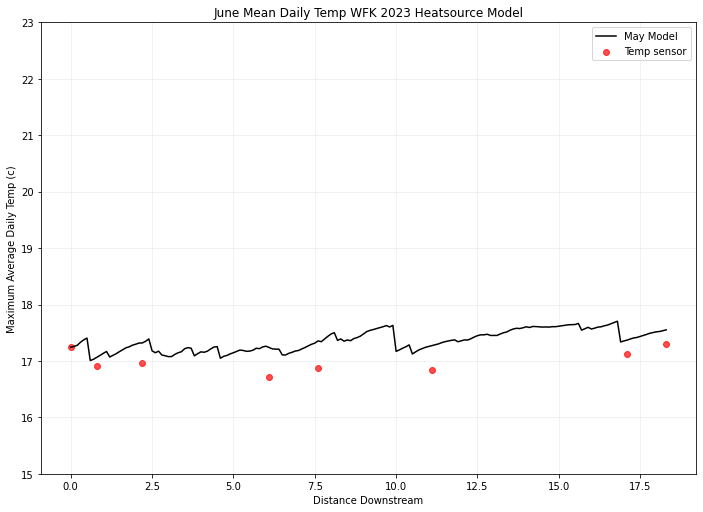

In [93]:
june_source_folder = r'D:/Ben_wd/THESIS/heatsource/WestFork/ModelRuns/Hayes/calibration/03152024_updatedinputs/June'

scenario_control_file = pd.read_csv(os.path.join(june_source_folder, 'HeatSource_Control.csv'))

cc_start = scenario_control_file.loc[7]['VALUE']
cc_start = pd.to_datetime(cc_start)
cc_end = scenario_control_file.loc[8]['VALUE']
cc_end = pd.to_datetime(cc_end)

#obs data
obs = pd.read_csv(r"D:\Ben_wd\THESIS\streamtemperature\WFK23\Summer23\mainstemhourly_km.csv")
obs["datetime"] = pd.to_datetime(obs["datetime"])
obs_clip = obs[(obs["datetime"]>=cc_start) & (obs["datetime"]<cc_end + pd.DateOffset(1))]
obs_clip = obs_clip.dropna(axis=1)
obs_clip = obs_clip.set_index('datetime')
#obs_clip.columns = [float(col) for col in obs_clip.columns[2:]]
obs_clip.columns = [float(col) for col in obs_clip.columns]
#obs_clip.drop(19.2, axis=1, inplace=True)
#summaries for obs data
mean_may_obs = obs_clip.mean()
mean_may_obs = pd.DataFrame(mean_may_obs)
mean_may_obs = mean_may_obs.reset_index()
mean_may_obs.rename(columns={'index': 'NODE_ID', 0 : 'Mean May Temp'}, inplace=True)
mean_may_obs['distance downstream'] = 18.3 - mean_may_obs['NODE_ID']

#summaries for modeled data

may_tw_df = pd.read_csv(os.path.join(june_source_folder, 'outputs', 'Temp_H2O.csv'), skiprows=6,
         usecols=range(1, 185))
may_tw_df.columns = [float(col) for col in may_tw_df.columns]
may_tw_df.index = obs_clip.index
#mean july
mean_may_mod = may_tw_df.mean()
mean_may_mod = pd.DataFrame(mean_may_mod)
mean_may_mod = mean_may_mod.reset_index()
mean_may_mod.rename(columns={'index': 'NODE_ID', 0 : 'Mean May Temp'}, inplace=True)
mean_may_mod['distance downstream'] = 18.3 - mean_may_mod['NODE_ID']





plt.figure(figsize=(10, 7))
plt.plot(mean_may_mod.index/10, mean_may_mod['Mean May Temp'], label='May Model', color = 'black')
#plt.plot(max_dailymean_scenario.index/10,max_dailymean_scenario['Max Daily Mean July Temp'],  label = 'Shade Scenario Model')
plt.scatter(mean_may_obs['distance downstream'], mean_may_obs['Mean May Temp'], label = 'Temp sensor', color = 'red', alpha = .7)
#this line is just for legend item
#plt.scatter(base_shade_df_mean.index/10, base_shade_df_mean['yvalue'], c='orange', s = 15, label = 'Not Shaded', marker = 's')

#plt.scatter(base_shade_df_mean.index/10, base_shade_df_mean['yvalue'], c=base_shade_df_mean['color'], s = 15, label = 'Shaded', marker = 's')
#plt.vlines(trib_dict_downstream, ymin = 20, ymax = 25, label = 'Tributary', linestyles = 'dashed', alpha = .4)


plt.ylabel('Maximum Average Daily Temp (c)')
plt.xlabel('Distance Downstream')
#plt.figure(facecolor='black')

    # Adjust layout
plt.tight_layout()
plt.grid(alpha = .2)
plt.ylim(15, 23)
#plt.vlines(trib_dict_downstream, ymin = 20, ymax = 25, label = 'Tribs',color = 'Orange', linestyles = 'dashed')
plt.legend()
plt.title('June Mean Daily Temp WFK 2023 Heatsource Model')
#plt.savefig('JulyDailyMean_withtribs.png')
plt.show()

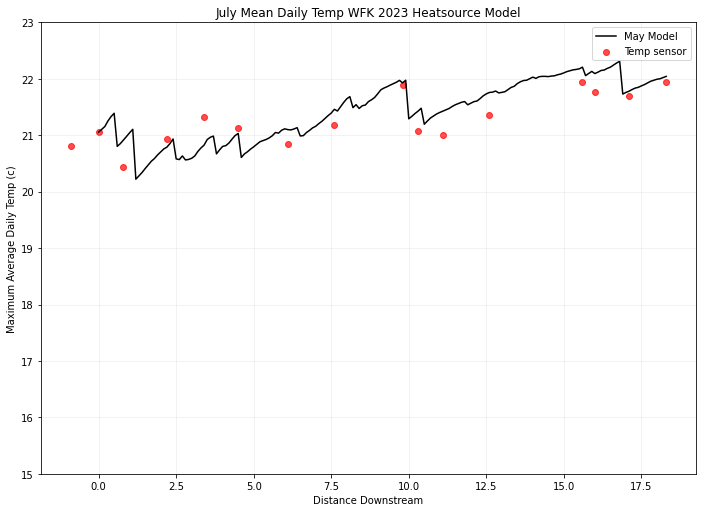

In [53]:
july_source_folder =  r'D:/Ben_wd/THESIS/heatsource/WestFork/ModelRuns/Hayes/calibration/03152024_updatedinputs/July'

scenario_control_file = pd.read_csv(os.path.join(july_source_folder, 'HeatSource_Control.csv'))

cc_start = scenario_control_file.loc[7]['VALUE']
cc_start = pd.to_datetime(cc_start)
cc_end = scenario_control_file.loc[8]['VALUE']
cc_end = pd.to_datetime(cc_end)

#obs data
obs = pd.read_csv(r"D:\Ben_wd\THESIS\streamtemperature\WFK23\Summer23\mainstemhourly_km.csv")
obs["datetime"] = pd.to_datetime(obs["datetime"])
obs_clip = obs[(obs["datetime"]>=cc_start) & (obs["datetime"]<cc_end + pd.DateOffset(1))]
obs_clip = obs_clip.dropna(axis=1)
obs_clip = obs_clip.set_index('datetime')
#obs_clip.columns = [float(col) for col in obs_clip.columns[2:]]
obs_clip.columns = [float(col) for col in obs_clip.columns]
#obs_clip.drop(19.2, axis=1, inplace=True)
#summaries for obs data
mean_may_obs = obs_clip.mean()
mean_may_obs = pd.DataFrame(mean_may_obs)
mean_may_obs = mean_may_obs.reset_index()
mean_may_obs.rename(columns={'index': 'NODE_ID', 0 : 'Mean May Temp'}, inplace=True)
mean_may_obs['distance downstream'] = 18.3 - mean_may_obs['NODE_ID']

#summaries for modeled data

may_tw_df = pd.read_csv(os.path.join(july_source_folder, 'outputs', 'Temp_H2O.csv'), skiprows=6,
         usecols=range(1, 185))
may_tw_df.columns = [float(col) for col in may_tw_df.columns]
may_tw_df.index = obs_clip.index
#mean july
mean_may_mod = may_tw_df.mean()
mean_may_mod = pd.DataFrame(mean_may_mod)
mean_may_mod = mean_may_mod.reset_index()
mean_may_mod.rename(columns={'index': 'NODE_ID', 0 : 'Mean May Temp'}, inplace=True)
mean_may_mod['distance downstream'] = 18.3 - mean_may_mod['NODE_ID']





plt.figure(figsize=(10, 7))
plt.plot(mean_may_mod.index/10, mean_may_mod['Mean May Temp'], label='May Model', color = 'black')
#plt.plot(max_dailymean_scenario.index/10,max_dailymean_scenario['Max Daily Mean July Temp'],  label = 'Shade Scenario Model')
plt.scatter(mean_may_obs['distance downstream'], mean_may_obs['Mean May Temp'], label = 'Temp sensor', color = 'red', alpha = .7)
#this line is just for legend item
#plt.scatter(base_shade_df_mean.index/10, base_shade_df_mean['yvalue'], c='orange', s = 15, label = 'Not Shaded', marker = 's')

#plt.scatter(base_shade_df_mean.index/10, base_shade_df_mean['yvalue'], c=base_shade_df_mean['color'], s = 15, label = 'Shaded', marker = 's')
#plt.vlines(trib_dict_downstream, ymin = 20, ymax = 25, label = 'Tributary', linestyles = 'dashed', alpha = .4)


plt.ylabel('Maximum Average Daily Temp (c)')
plt.xlabel('Distance Downstream')
#plt.figure(facecolor='black')

    # Adjust layout
plt.tight_layout()
plt.grid(alpha = .2)
plt.ylim(15, 23)
#plt.vlines(trib_dict_downstream, ymin = 20, ymax = 25, label = 'Tribs',color = 'Orange', linestyles = 'dashed')
plt.legend()
plt.title('July Mean Daily Temp WFK 2023 Heatsource Model')
#plt.savefig('JulyDailyMean_withtribs.png')
plt.show()

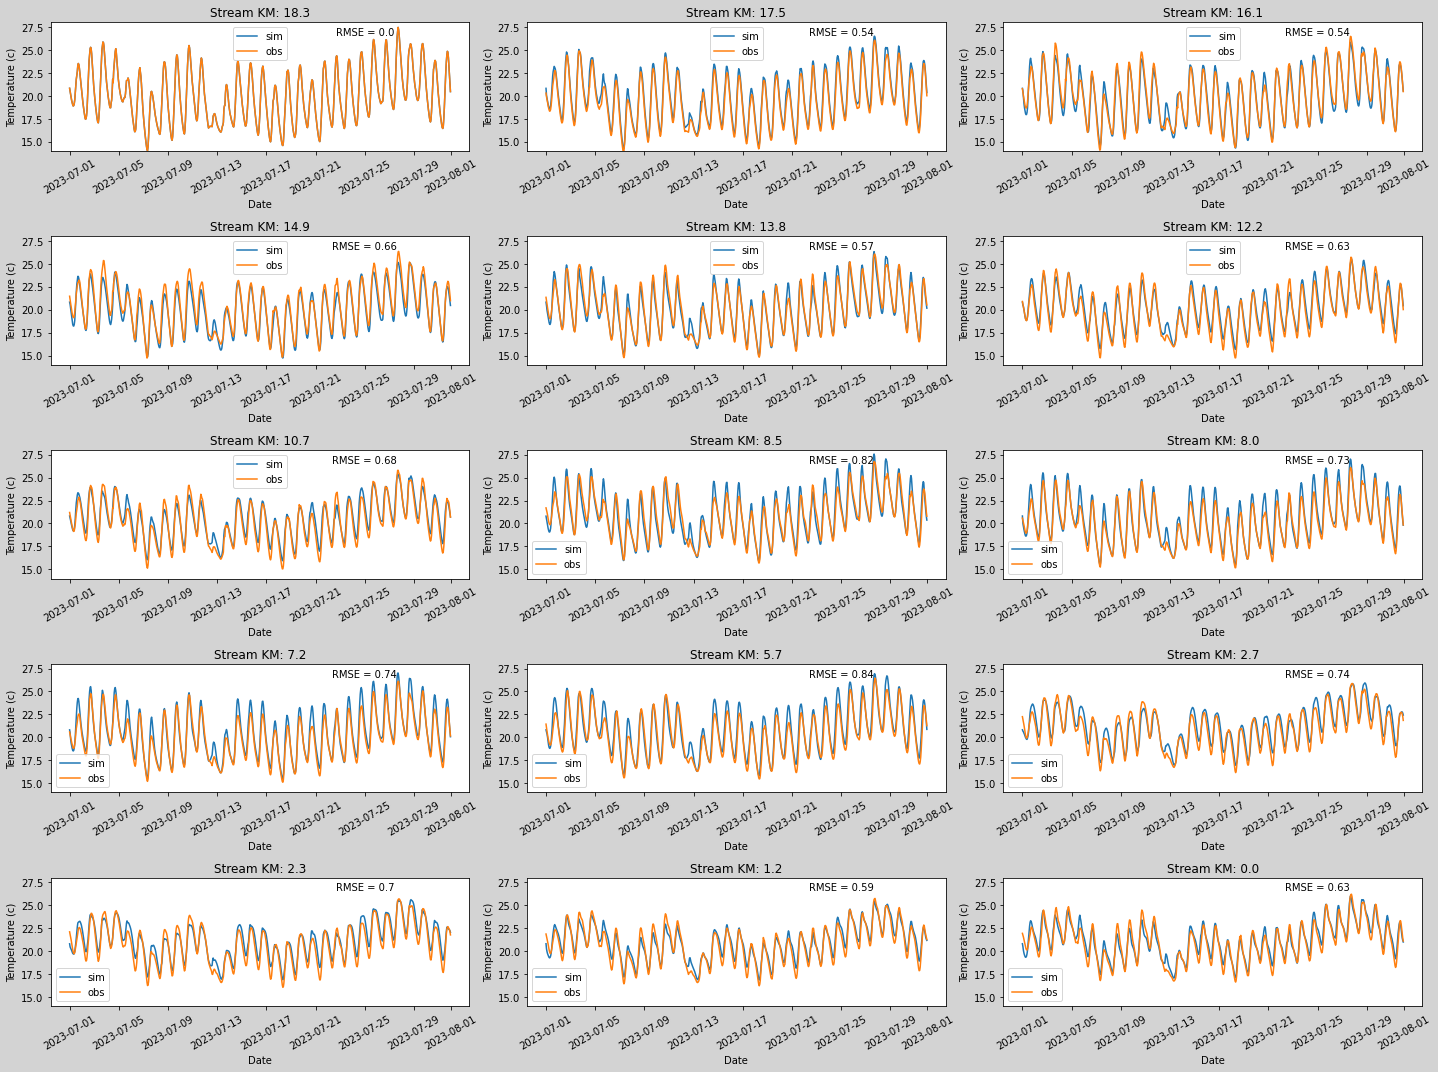

In [63]:
#all of july

#Run June
hs_run =  rmse_sorted.iloc[0]
source_folder = r'D:/Ben_wd/THESIS/heatsource/WestFork/ModelRuns/Hayes/calibration/03152024_updatedinputs/July_monthly'
os.chdir(source_folder)  # Change the current working directory

control_file = pd.read_csv(os.path.join(source_folder, 'HeatSource_Control.csv'))
morph_file = pd.read_csv(os.path.join(source_folder, "inputs", 'WFK23_morphology.csv'))
accretion_file = pd.read_csv(os.path.join(source_folder, "inputs", 'WFK23_accretion_notrib.csv'))
lccode_file = pd.read_csv(os.path.join(source_folder, "inputs", 'WFK23_lccode.csv'))

control_file.loc[2, 'VALUE'] = os.path.join(source_folder, "inputs\ ")# outputs folder
control_file.loc[3, 'VALUE'] = os.path.join(source_folder, "outputs\ ")# outputs folder


control_file.loc[25, 'VALUE'] = hs_run['wind function a']  # wind function a
control_file.loc[26, 'VALUE'] = hs_run['wind function b']  # wind function b
#control_file.loc[28, 'VALUE'] = hs_run['deep alluvium temp'] # deep alluvium temp
control_file.to_csv(os.path.join(source_folder, 'HeatSource_Control.csv'), index = False)

# Populate flow parameters
morph_file['SED_THERMAL_CONDUCTIVITY'] = hs_run['thermal conductivity']  # thermal conductivity
morph_file['SED_THERMAL_DIFFUSIVITY'] = hs_run['thermal diffusivity']  # thermal diffusivity
morph_file['SED_HYPORHEIC_THICKNESSS'] = hs_run['hypo thickness']  # hypo thickness
morph_file['HYPORHEIC_PERCENT'] = hs_run['hypo %']  # hypo %
morph_file['POROSITY'] = hs_run['sediment porosity']  # sediment porosity
#morph_file['MANNINGS_n']=lhs[n, 7] # Mannings N
morph_file.to_csv(os.path.join(source_folder, "inputs", 'WFK23_morphology.csv'), index = False)
#LCCode file
lccode_file["CANOPY"].iloc[1:] = hs_run['tree canopy'] #for tree polygons
lccode_file["OVERHANG"].iloc[1:] = hs_run['tree overhang'] #overhang for tree polygons
lccode_file["CANOPY"].iloc[:1] = hs_run['grass canopy'] #for grass polygons
lccode_file["OVERHANG"].iloc[:1] = hs_run['grass overhang'] #overhang for grass polygons

lccode_file.to_csv(os.path.join(source_folder, "inputs", 'WFK23_lccode.csv'), index = False)


# Populate accretion parameterss
accretion_file['TEMPERATURE'] = hs_run['accretion temp'] #accretion temp
accretion_file.to_csv(os.path.join(source_folder, "inputs", 'WFK23_accretion_notrib.csv'), index = False)


# Run HS9
#os.system('D:/Ben_wd/THESIS/heatsource/WestFork/ModelRuns/Hayes/runs/latinhypercubetest/hs9_run_temperature.py')
#!hs run -t
#subprocess.run(['hs', 'run', '-t'], cwd=source_folder, stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
#Compare and plot
#get start and end dates
cc_start = control_file.loc[7]['VALUE']
cc_start = pd.to_datetime(cc_start)
cc_end = control_file.loc[8]['VALUE']
cc_end = pd.to_datetime(cc_end)
#organize Obs data
obs = pd.read_csv(r"D:\Ben_wd\THESIS\streamtemperature\WFK23\Summer23\mainstemhourly_km.csv")
obs["datetime"] = pd.to_datetime(obs["datetime"])
obs_clip = obs[(obs["datetime"]>=cc_start) & (obs["datetime"]<cc_end + pd.DateOffset(1))]
obs_clip = obs_clip.dropna(axis=1)
obs_clip = obs_clip.set_index('datetime')
#obs_clip.columns = [float(col) for col in obs_clip.columns[2:]]
obs_clip.columns = [float(col) for col in obs_clip.columns]
obs_clip.drop(19.2, axis=1, inplace=True)
obs_tw = obs_clip.to_numpy()
#Organize Sim data
sim_tw_df = pd.read_csv(os.path.join(source_folder, 'outputs', 'Temp_H2O.csv'), skiprows=6,
         usecols=range(1, 185))
sim_tw_df.columns = [float(col) for col in sim_tw_df.columns]
common_columns = set(sim_tw_df.columns) & set(obs_clip.columns)
sim_tw_df = sim_tw_df[obs_clip.columns]
sim_tw = sim_tw_df.to_numpy()
#print(starting_run_number)

#plotting
# Create a new figure with a 3x3 grid of subplots
fig, axes = plt.subplots(5, 3, figsize=(20, 15))

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Iterate through columns and plot each one in its own subplot
for i, col in enumerate(obs_clip.columns):
    rmse_values = np.sqrt(np.mean((sim_tw - obs_tw) ** 2, axis=0))
    title = str(col)
    axes[i].plot(obs_clip.index, sim_tw_df[col], label='sim')
    axes[i].plot(obs_clip.index, obs_clip[col], label='obs')

    # Add labels, title, and legend to each subplot
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Temperature (c)')
    axes[i].set_title(f'Stream KM: {title}')
    axes[i].legend()
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].text(0.75, 0.9, f'RMSE = {round(rmse_values[i],2)}', horizontalalignment='center', transform=axes[i].transAxes)
    axes[i].set_ylim(14, 28)



   #Set background color of the figure
fig.patch.set_facecolor('lightgrey')

# Adjust layout
plt.tight_layout()

# Save the plot to a file
plt.savefig('June_tempcomparison_plot.png', facecolor=fig.get_facecolor())



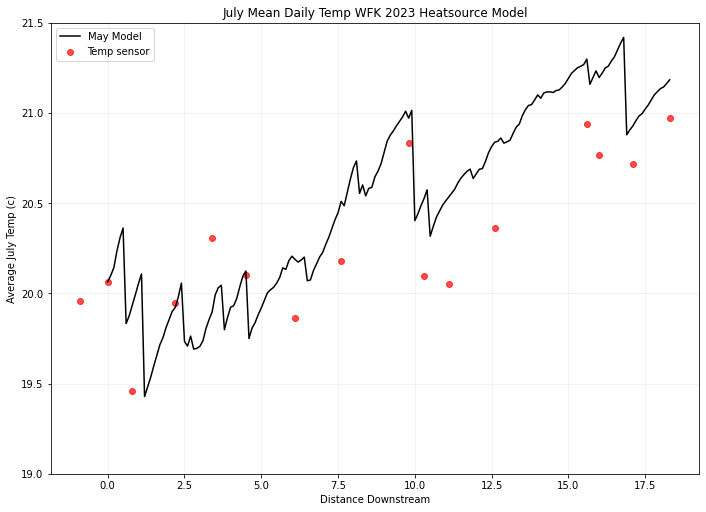

In [99]:
julymonthly_source_folder =  r'D:/Ben_wd/THESIS/heatsource/WestFork/ModelRuns/Hayes/calibration/03152024_updatedinputs/July_monthly'

scenario_control_file = pd.read_csv(os.path.join(julymonthly_source_folder, 'HeatSource_Control.csv'))

cc_start = scenario_control_file.loc[7]['VALUE']
cc_start = pd.to_datetime(cc_start)
cc_end = scenario_control_file.loc[8]['VALUE']
cc_end = pd.to_datetime(cc_end)

#obs data
obs = pd.read_csv(r"D:\Ben_wd\THESIS\streamtemperature\WFK23\Summer23\mainstemhourly_km.csv")
obs["datetime"] = pd.to_datetime(obs["datetime"])
obs_clip = obs[(obs["datetime"]>=cc_start) & (obs["datetime"]<cc_end + pd.DateOffset(1))]
obs_clip = obs_clip.dropna(axis=1)
obs_clip = obs_clip.set_index('datetime')
#obs_clip.columns = [float(col) for col in obs_clip.columns[2:]]
obs_clip.columns = [float(col) for col in obs_clip.columns]
#obs_clip.drop(19.2, axis=1, inplace=True)
#summaries for obs data
mean_may_obs = obs_clip.mean()
mean_may_obs = pd.DataFrame(mean_may_obs)
mean_may_obs = mean_may_obs.reset_index()
mean_may_obs.rename(columns={'index': 'NODE_ID', 0 : 'Mean May Temp'}, inplace=True)
mean_may_obs['distance downstream'] = 18.3 - mean_may_obs['NODE_ID']

#summaries for modeled data

may_tw_df = pd.read_csv(os.path.join(julymonthly_source_folder, 'outputs', 'Temp_H2O.csv'), skiprows=6,
         usecols=range(1, 185))
may_tw_df.columns = [float(col) for col in may_tw_df.columns]
may_tw_df.index = obs_clip.index
#mean july
mean_may_mod = may_tw_df.mean()
mean_may_mod = pd.DataFrame(mean_may_mod)
mean_may_mod = mean_may_mod.reset_index()
mean_may_mod.rename(columns={'index': 'NODE_ID', 0 : 'Mean May Temp'}, inplace=True)
mean_may_mod['distance downstream'] = 18.3 - mean_may_mod['NODE_ID']





plt.figure(figsize=(10, 7))
plt.plot(mean_may_mod.index/10, mean_may_mod['Mean May Temp'], label='May Model', color = 'black')
#plt.plot(max_dailymean_scenario.index/10,max_dailymean_scenario['Max Daily Mean July Temp'],  label = 'Shade Scenario Model')
plt.scatter(mean_may_obs['distance downstream'], mean_may_obs['Mean May Temp'], label = 'Temp sensor', color = 'red', alpha = .7)
#this line is just for legend item
#plt.scatter(base_shade_df_mean.index/10, base_shade_df_mean['yvalue'], c='orange', s = 15, label = 'Not Shaded', marker = 's')

#plt.scatter(base_shade_df_mean.index/10, base_shade_df_mean['yvalue'], c=base_shade_df_mean['color'], s = 15, label = 'Shaded', marker = 's')
#plt.vlines(trib_dict_downstream, ymin = 20, ymax = 25, label = 'Tributary', linestyles = 'dashed', alpha = .4)


plt.ylabel('Average July Temp (c)')
plt.xlabel('Distance Downstream')
#plt.figure(facecolor='black')

    # Adjust layout
plt.tight_layout()
plt.grid(alpha = .2)
plt.ylim(19, 21.5)
#plt.vlines(trib_dict_downstream, ymin = 20, ymax = 25, label = 'Tribs',color = 'Orange', linestyles = 'dashed')
plt.legend()
plt.title('July Mean Daily Temp WFK 2023 Heatsource Model')
#plt.savefig('JulyDailyMean_withtribs.png')
plt.show()

In [101]:
sim_tw_df

,18.3,17.5,16.1,12.2,10.7,7.2,1.2,0.0
datetime,,,,,,,,
2023-06-11 00:00:00,17.701,17.6956,17.6938,17.6923,17.6933,17.6969,17.6954,17.6941
2023-06-11 01:00:00,17.320,17.0967,17.3915,17.3523,17.4124,17.3746,17.2286,17.3529
2023-06-11 02:00:00,17.011,16.7901,17.0466,17.2252,17.1781,16.9107,16.9616,17.0285
2023-06-11 03:00:00,16.654,16.4350,16.5199,16.8746,16.8225,16.5495,16.7305,16.7028
2023-06-11 04:00:00,16.177,16.0108,16.0311,16.4786,16.4968,16.1806,16.4929,16.4282
...,...,...,...,...,...,...,...,...
2023-06-16 19:00:00,21.963,21.9432,22.2431,21.8130,21.1092,21.9233,20.4317,20.6374
2023-06-16 20:00:00,21.008,21.1580,21.6578,21.5154,20.9662,21.0686,20.2137,20.2564
2023-06-16 21:00:00,20.031,20.2718,20.9251,21.0425,20.7289,20.2629,20.0429,19.9313


ValueError: operands could not be broadcast together with shapes (31,184) (31,16) 

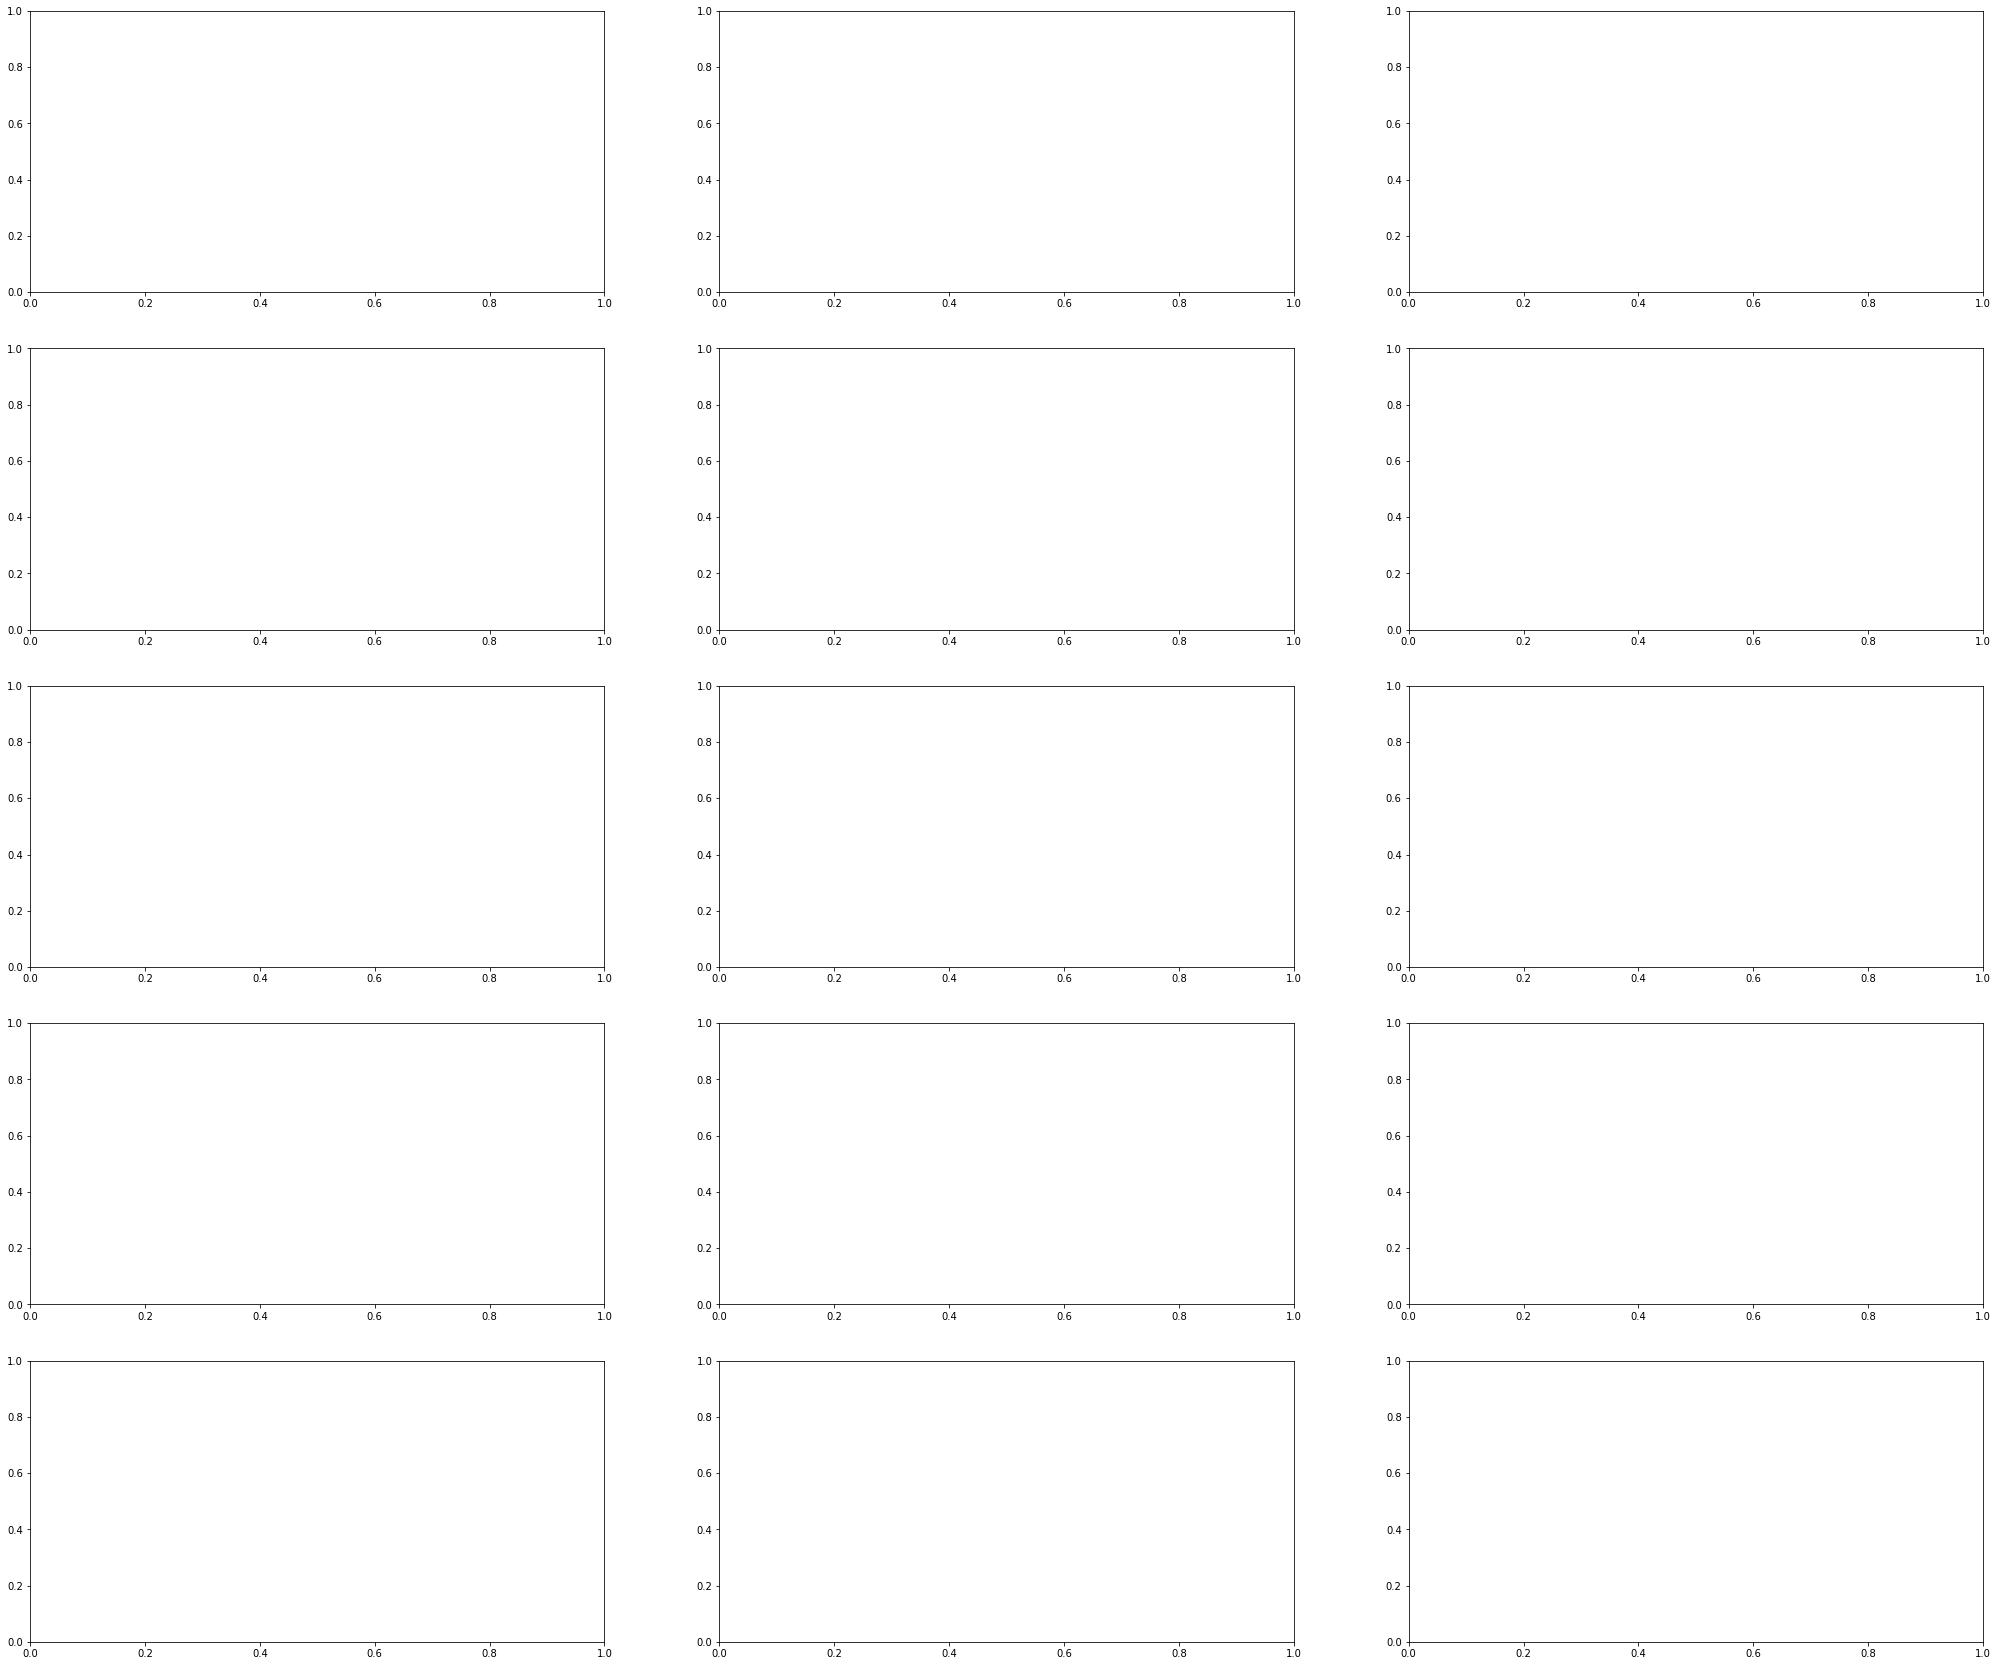

In [102]:
#Daily Mean Scatterplotsjuly_mean_obs = obs_clip.mean()
obs_daily_mean = obs_clip.resample('D').mean()
may_tw_df.index = obs_clip.index
sim_daily_mean = may_tw_df.resample('D').mean()
#obs_daily_mean = obs_clip.resample('D').mean()

#Plot
fig, axes = plt.subplots(5, 3, figsize=(35, 30))

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Iterate through columns and plot each one in its own subplot
for i, col in enumerate(obs_clip.columns):
    rmse_values = np.sqrt(np.mean((sim_daily_mean.to_numpy() - obs_daily_mean.to_numpy()) ** 2, axis=0))
    title = str(col)
    axes[i].scatter(sim_daily_mean[col], obs_daily_mean[col])
    axes[i].plot(sim_daily_mean, sim_daily_mean, color='red')  # Plotting the y=x line

    # axes[i].plot(obs_clip.index, obs_clip[col], label='obs')

    # Add labels, title, and legend to each subplot
    axes[i].set_xlabel('Simulated')
    axes[i].set_ylabel('Observed')
    axes[i].set_title(f'Stream KM: {title}')
    axes[i].legend()
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].text(0.75, 0.9, f'RMSE = {round(rmse_values[i],2)}', horizontalalignment='center', transform=axes[i].transAxes)


#Set background color of the figure
fig.patch.set_facecolor('lightgrey')
plt.savefig('dailymean_compare.png', facecolor=fig.get_facecolor())

# Adjust layout
plt.tight_layout()